Initial Data (First Few Rows):


Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
"The Guv'nor, Spain","We asked some of our most prized winemakers working in Spain to make the best wines possible â€“ no rules, no restrictions, no red tape. The Guv'nor collection was their answer. Made from Tempranillo grapes picked from their favourite vineyards across Spain, itâ€™s a crowd-pleasing wine designed to be shared with good food â€“ and even better company. Itâ€™s bold. Itâ€™s fruity. Itâ€™s a modern Spanish red that goes with everything, especially spicy barbecue meats or anything chargrilled.",Â£9.99 per bottle,75CL,Tempranillo,nan,Natural Cork,Spain,10.500000,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,nan,Rich & Juicy,NV,nan
"Bread & Butter 'Winemaker's Selection' Chardonnay 2020/21, California","This really does what it says on the tin. Itâ€™s a lush Chardonnay which tastes of â€“ you guessed it â€“ bread and butter. The winemaking team combine grapes from two very different regions to create something full but fresh. Monterey is known for its big Chardonnays, but Carneros is far cooler, so flavours are more understated. And you'll taste the benefits in this bold and buttery wine. Itâ€™s silky smooth with fresh notes of citrus and vanilla. Itâ€™s incredibly versatile, but we like it best with creamy tarragon chicken or soft, creamy cheese.",Â£15.99 per bottle,75CL,Chardonnay,nan,Natural Cork,USA,10.100000,"Vanilla, Almond, Coconut, Green Apple, Peach, Pineapple, Stone Fruit",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
"Oyster Bay Sauvignon Blanc 2022, Marlborough","Oyster Bay has been an award-winning gold-standard Marlborough Sauvignon since its very first vintage, and itâ€™s only got better and better. It was even formerly named the â€˜Best Sauvignon Blanc in the Worldâ€™ â€“ and they have the name recognition to prove it. Itâ€™s really no surprise then that their Sauvignon is textbook Marlborough. Big. Fruity. Tropical. To say itâ€™s mouth-wateringly refreshing is an understatement â€“ the smell of gooseberries and lime will hit you the minute you unscrew the bottle. Itâ€™s really versatile â€“ delicious as a glassful on sofa, for parties or with a flaky goatâ€™s cheese tart. In 2022, this wine won an IWC award for the 2021 vintage.",Â£12.49 per bottle,75CL,Sauvignon Blanc,nan,Screwcap,New Zealand,9.800000,"Tropical Fruit, Gooseberry, Grapefruit, Grass, Green Apple, Lemon, Stone Fruit",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,nan
Louis Latour MÃ¢con-Lugny 2021/22,"Weâ€™ve sold this wine for thirty years â€“ and for that whole time itâ€™s been a bestseller. Whyâ€™s it so popular? White Burgundy is a go-to for Chardonnay drinkers, and the MÃ¢connais in particular offers great value. Unlike the northern CÃ´tes, the southern part of Burgundy doesnâ€™t have a formalised vineyard hierarchy system. So the wines tend to be a bit more wallet-friendly. Not to mention, Lugny is one of the best regarded villages in the MÃ¢con, and Latour one of the most famous houses. Honeyed. Peachy. Crisp. A dream with salty finger foods or a classic Sunday roast chicken. Itâ€™s proof that sometimes it pays to stick with the old favourites.",Â£17.99 per bottle,75CL,Chardonnay,nan,Natural Cork,France,10.100000,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
"Bread & Butter 'Winemaker's Selection' Pinot Noir 2021, California","Bread & Butter is that thing that you can count on. Itâ€™s dependable, comforting â€“ you know what to expect. Thatâ€™s exactly what youâ€™ll get with this wine, a textbook Californian Pinot Noir from the same winery which brought you the sell-out Bread & Butter Chardonnay. Their vineyards are ideally located for classic varieties like Pinot. Itâ€™s sun-drenched, but cooled by the daily morning mists which roll in off the Pacific. Itâ€™


Data Types and Missing Values:


Column,Non-Null Count,Dtype
Title,1290,object
Description,1286,object
Price,1290,object
Capacity,1290,object
Grape,1275,object



Data After Adjustments (First Few Rows):


Type,Grape,Price,price_range
Red,Tempranillo,9.990000,0-20
White,Chardonnay,15.990000,0-20
White,Sauvignon Blanc,12.490000,0-20
White,Chardonnay,17.990000,0-20
Red,Pinot Noir,15.990000,0-20


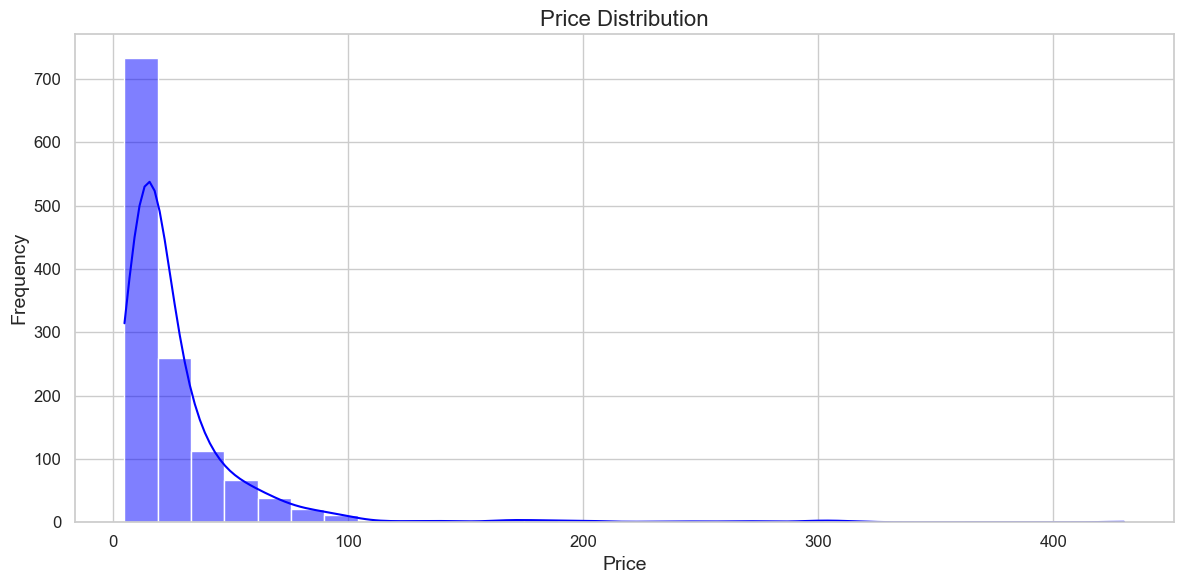

C:\Users\Sistrade\AppData\Local\Temp\ipykernel_21244\2250289846.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df, palette='viridis')


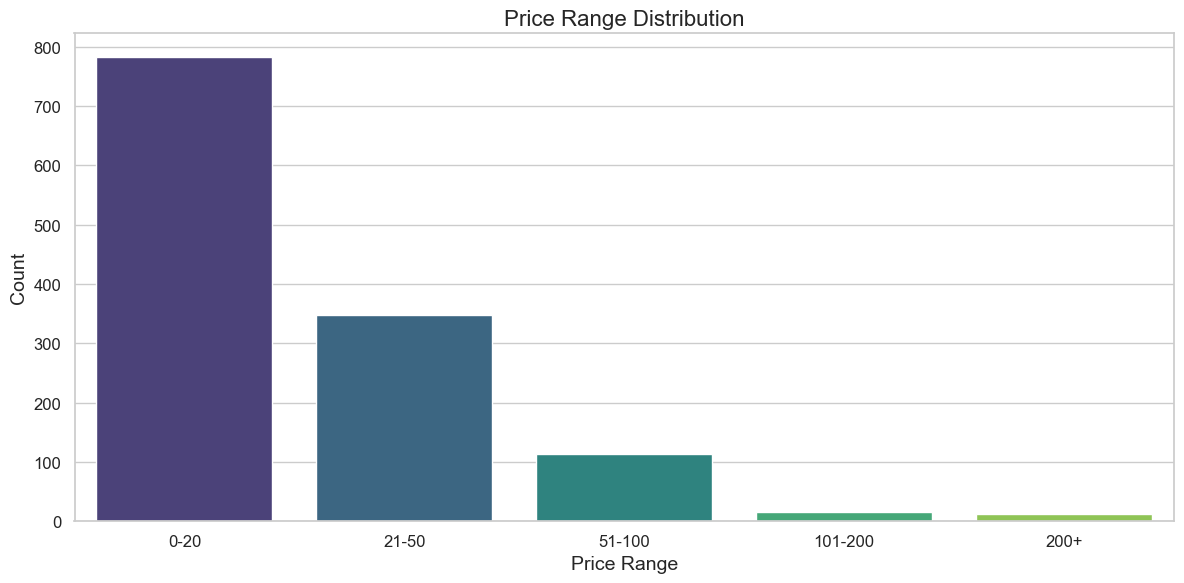

C:\Users\Sistrade\AppData\Local\Temp\ipykernel_21244\2250289846.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='cool')


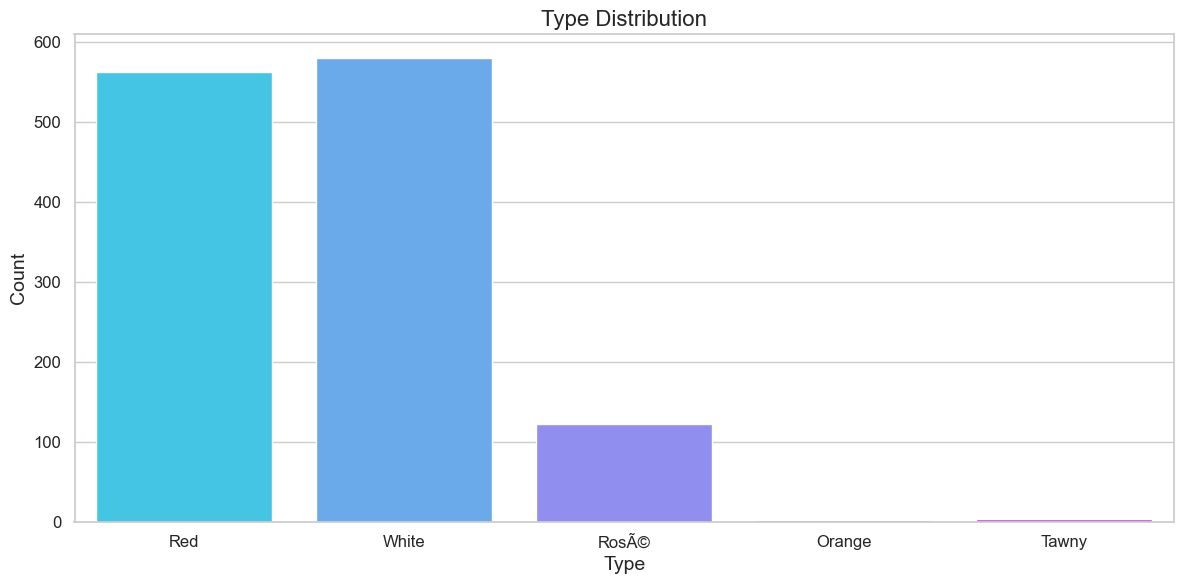

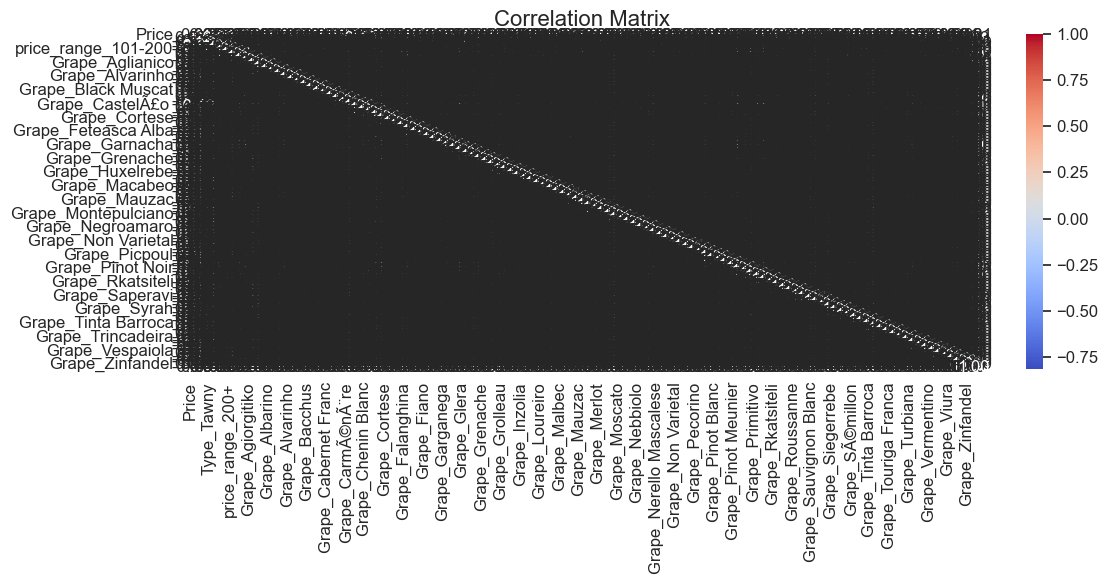

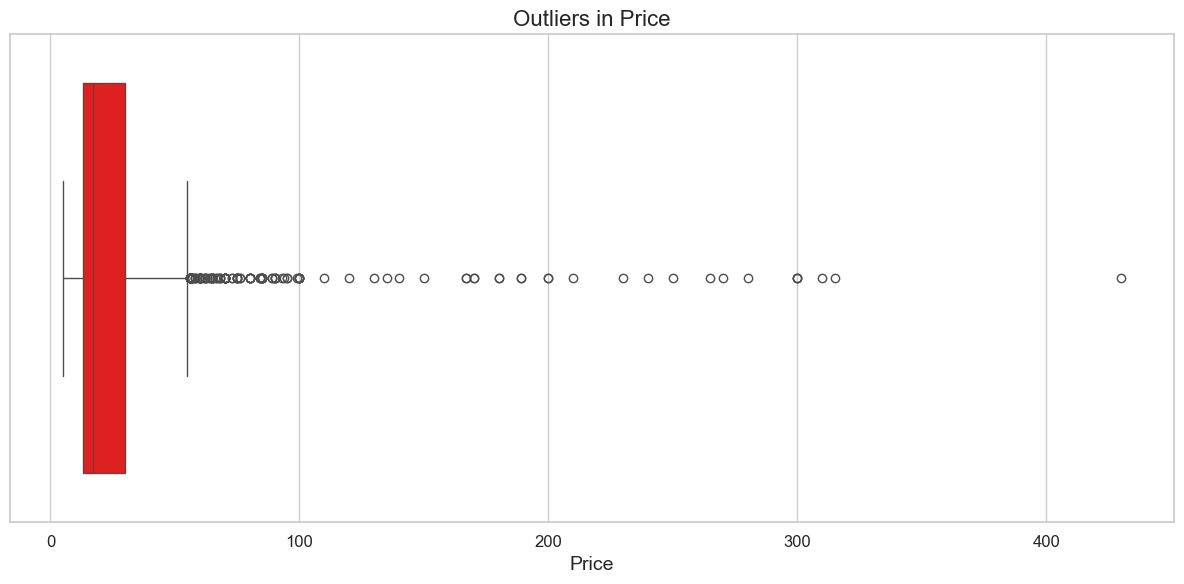

In [20]:
# Import required libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

# Seaborn and Matplotlib configurations for modern aesthetics
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12

def display_table(df, title="Table"):
    """Display a DataFrame as a styled table."""
    return df.head().style.set_caption(title).set_table_styles(
        [{'selector': 'th', 'props': [('font-size', '14px'), ('text-align', 'center')]},
         {'selector': 'td', 'props': [('font-size', '12px'), ('text-align', 'center')]},
         {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]}]
    ).hide(axis='index')

# Load dataset
df = pd.read_csv('../datasets/WineDataset.csv')

# Display initial data
print("Initial Data (First Few Rows):")
display(display_table(df, title="Initial Data"))

# Show data types and missing values summary
print("\nData Types and Missing Values:")
info_table = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.notnull().sum().values,
    "Dtype": df.dtypes.values
})
display(display_table(info_table, title="Data Types and Missing Values"))

# Select relevant columns
df = df[['Type', 'Grape', 'Price']]

# Clean the 'Price' column by extracting numerical values
df['Price'] = df['Price'].apply(lambda x: float(re.sub(r'[^\d.]', '', x)) if isinstance(x, str) else np.nan)

# Drop rows with missing or invalid prices
df = df.dropna(subset=['Price'])

# Define price bins and labels
price_bins = [0, 20, 50, 100, 200, np.inf]
price_labels = ['0-20', '21-50', '51-100', '101-200', '200+']
df['price_range'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)

# Drop rows with missing values in categorical columns
df = df.dropna(subset=['Type', 'Grape', 'price_range'])

# Display adjusted data
print("\nData After Adjustments (First Few Rows):")
display(display_table(df, title="Adjusted Data"))

# One-Hot Encoding for 'Type' and 'price_range'
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
type_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[['Type']]), columns=one_hot_encoder.get_feature_names_out(['Type']))
price_range_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[['price_range']]), columns=one_hot_encoder.get_feature_names_out(['price_range']))

# Binary Encoding for 'Grape'
label_binarizer = LabelBinarizer()
grape_encoded = pd.DataFrame(
    label_binarizer.fit_transform(df['Grape']), 
    columns=[f"Grape_{cls}" for cls in label_binarizer.classes_]
)

# Combine all encoded data into a single dataframe
df_encoded = pd.concat([df[['Price']], type_encoded, price_range_encoded, grape_encoded], axis=1)

# Plot distribution of Price
sns.histplot(df['Price'], kde=True, bins=30, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot Price Range Distribution
sns.countplot(x='price_range', data=df, palette='viridis')
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot Type Distribution
sns.countplot(x='Type', data=df, palette='cool')
plt.title('Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Correlation Matrix Visualization
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Detecting Outliers using Boxplot
sns.boxplot(x=df['Price'], color='red')
plt.title('Outliers in Price')
plt.xlabel('Price')
plt.tight_layout()
plt.show()
